In [1]:
from google.colab import drive
drive.mount('/tfcontent')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /tfcontent


In [2]:
!ls '/tfcontent/My Drive/'

"Abhi's 2018 CV.docx"		   demandformoney.csv
 ANN_attemp1_complete.ipynb	   Dollally_review.csv
 Chicago_Crimes_2008_to_2011.csv  'Logistics Regression.txt'
 Chicago_Crimes_2012_to_2017.csv   NN_attemp1.ipynb
 Churn_Modelling.csv		   test_set
'Colab Notebooks'		   Untitled0.ipynb


#Importing data using latin=1 since 'utf-8'error and encoding='utf-8' won't work

In [3]:

import pandas as pd
import numpy as np
data=pd.read_csv(r'/tfcontent/My Drive/Dollally_review.csv',header=0,encoding='latin1')
data.head(2)

,Review,Location,Rating
0,One of the most casual places suburbs has. Wit...,Andheri,4
1,Doolally one of the coolest place to chill and...,Andheri,4


# Let's check a review and see how many rows and columns are there

In [5]:
print(data.shape)



data.iloc[27]["Review"]

(50, 3)


"Doolally is my all time favorite spot. No loud music , no dim lights . It's the perfect fun place for get-togethers. Plus they have lots of fun games and quiz nights.\nThe only disappoint is they have stopped apple cider which was my favorite and replaced it with mango cider(which is equally good but apple cider is louve)"

#Labelling data

In [39]:
data['Label']=['Positive' if star > 3 else 'Negative' for star in data['Rating']];
data.head()

,Review,Location,Rating,Label
0,One of the most casual places suburbs has. Wit...,Andheri,4,Positive
1,Doolally one of the coolest place to chill and...,Andheri,4,Positive
2,It?s a great place to hangout with your friend...,Andheri,5,Positive
3,ÿDoolally Taproom has a very nice jovial atmos...,Andheri,4,Positive
4,ÿService in this place is really bad! The wait...,Andheri,1,Negative


In [0]:
x=data['Review']
y=data['Label']

In [41]:
import nltk
nltk.download('stopwords')
import string # importing string bcz was getting string error while joining sentences
stop = set(stopwords.words('english'))
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
def clean_document(doco):
    punctuation = string.punctuation
    punc_replace = ''.join([' ' for s in punctuation])
    doco_link_clean = re.sub(r'http\S+', '', doco)
    doco_clean_and = re.sub(r'&\S+', '', doco_link_clean)
    doco_clean_at = re.sub(r'@\S+', '', doco_clean_and)
    doco_clean = doco_clean_at.replace('-', ' ')
    doco_alphas = re.sub(r'\W +', ' ', doco_clean)
    trans_table = str.maketrans(punctuation, punc_replace)
    doco_clean = ' '.join([word.translate(trans_table) for word in doco_alphas.split(' ')])
    doco_clean = doco_clean.split(' ')
    p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
    doco_clean = [word.lower() for word in doco_clean if len(word) > 2]
    doco_clean = ([i for i in doco_clean if i not in stop])
#     doco_clean = [spell(word) for word in doco_clean]
#     p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
#     doco_clean = ([spell(k) for k in doco_clean])
    return doco_clean

In [0]:
cleaned_reviews = [clean_document(doc) for doc in data['Review']]; 
sentences = [' '.join(r) for r in cleaned_reviews ] #joining

In [44]:
print(x[2],'\n')



print(sentences[2])

It?s a great place to hangout with your friends. It has so many arcade games to keep you involved till the time food arrives. Beer was very nicely brewed and was amazing. 

great place hangout friends many arcade games keep involved till time food arrives beer nicely brewed amazing


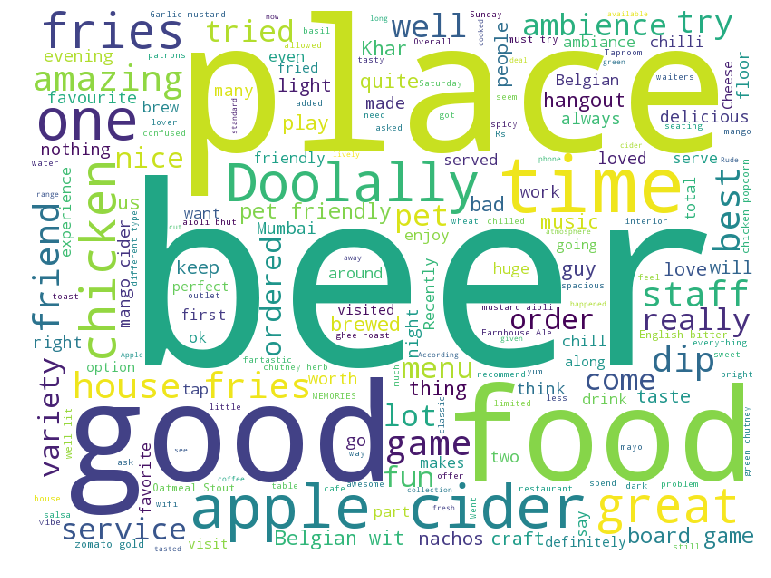

In [45]:
#Visualization in WordCloud 

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(x))

In [0]:
#Bag of words
from sklearn.feature_extraction.text import CountVectorizer#CountVectorizer is used to create bag of words which will help machine learn whether a certan word is good or bad
bow_transformer = CountVectorizer(analyzer=clean_document).fit(x)

In [0]:
X = bow_transformer.transform(x) # if we don't use transform function that we get ValueError: could not convert string to float:

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=(LogisticRegression())
#fitting training data to  the model
classifier.fit(X_train,y_train)
Y_pred=classifier.predict(X_test)
# print(list(zip(y_test,Y_pred)))
# print("Accuracy of the model:",acc)

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(y_test,Y_pred)
print(cfm)

# print("Classification report:")

# print(classification_report(y_test,Y_pred))

acc=accuracy_score(y_test,Y_pred)
print("Accuracy of the model:",acc)

[[ 0  4]
 [ 0 11]]
Accuracy of the model: 0.7333333333333333


In [51]:
classifier.predict(bow_transformer.transform(['very nice beers to taste fresh and refreshing will surely visit soon the staff is to friendly and knowledge in all aspects good location to enjoy with friends ']))

array(['Positive'], dtype=object)

In [52]:
classifier.predict(bow_transformer.transform(['Not at all satisfying portion of food, very expensive not happy :)']))

array(['Negative'], dtype=object)

#SVC

In [0]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train) 
predsvm=clf.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix, classification_report
cfm=confusion_matrix(y_test,Y_pred)
print(cfm)
acc=accuracy_score(y_test,Y_pred)
print("Accuracy of the model:",acc)
# print(confusion_matrix(y_test, Y_pred))
# # print('\n')
# # print(classification_report(y_test, predsvm))
# predsvm=clf.predict(X_test)
# clf.score(X_train,y_train)
# print("Accuracy of the model:",acc)

[[ 0  4]
 [ 0 11]]
Accuracy of the model: 0.7333333333333333


In [56]:
classifier.predict(bow_transformer.transform(['good food, good ambiance, I am very happy']))

array(['Positive'], dtype=object)

In [59]:
classifier.predict(bow_transformer.transform(['bad food, not happy at all']))

array(['Negative'], dtype=object)

#Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier()
model_DecisionTree.fit(X_train,y_train)
Y_pred=classifier.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(y_test,Y_pred)
print(cfm)

# print("Classification report:")

# print(classification_report(y_test,Y_pred))

acc=accuracy_score(y_test,Y_pred)
print("Accuracy of the model:",acc)

[[ 0  4]
 [ 0 11]]
Accuracy of the model: 0.7333333333333333


In [72]:
model_DecisionTree.predict(bow_transformer.transform(['good food, satisfied to the core']))

array(['Positive'], dtype=object)

In [102]:
classifier.predict(bow_transformer.transform(['Bad beer. They have just hyped ye flavours which are really not great']))

array(['Negative'], dtype=object)